In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import plotly.express as px
import seaborn as sns
import gc
import time
from sklearn.metrics import roc_auc_score
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
start_time = time.time()
meta_data = pd.read_csv('/content/drive/MyDrive/Multimodal_Single_Cell analysis/metadata.csv', index_col=0)
end_time = time.time()
print(end_time - start_time)
meta_data.head()

1.5285067558288574


,day,donor,cell_type,technology
cell_id,,,,
c2150f55becb,2,27678,HSC,citeseq
65b7edf8a4da,2,27678,HSC,citeseq
c1b26cb1057b,2,27678,EryP,citeseq
917168fa6f83,2,27678,NeuP,citeseq
2b29feeca86d,2,27678,EryP,citeseq


In [ ]:
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 281528 entries, c2150f55becb to b847ba21f59f
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   day         281528 non-null  int64 
 1   donor       281528 non-null  int64 
 2   cell_type   281528 non-null  object
 3   technology  281528 non-null  object
dtypes: int64(2), object(2)
memory usage: 10.7+ MB


In [ ]:
start_time = time.time()
train = pd.read_hdf('/content/drive/MyDrive/Multimodal_Single_Cell analysis/train_multi_targets.h5', stop=33500)
end_time = time.time()
print(end_time - start_time)

24.614080667495728


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33500 entries, 56390cf1b95e to 0f1b411a93f8
Columns: 23418 entries, ENSG00000121410 to ENSG00000074755
dtypes: float32(23418)
memory usage: 2.9+ GB


In [ ]:
train = pd.merge(meta_data, train, how='inner', on=['cell_id'])
train.head()

,day,donor,cell_type,technology,ENSG00000121410,ENSG00000268895,ENSG00000175899,ENSG00000245105,ENSG00000166535,ENSG00000256661,...,ENSG00000086827,ENSG00000174442,ENSG00000122952,ENSG00000198205,ENSG00000198455,ENSG00000070476,ENSG00000203995,ENSG00000162378,ENSG00000159840,ENSG00000074755
cell_id,,,,,,,,,,,,,,,,,,,,,
56390cf1b95e,2,32606,NeuP,multiome,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,4.893861,0.0,0.0,0.000000,0.0,5.583255,0.000000,4.893861
fc0c60183c33,2,32606,HSC,multiome,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
9b4a87e22ad0,2,32606,MasP,multiome,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,5.107832,0.0,0.0,0.000000,0.0,0.000000,0.000000,5.107832
81cccad8cd81,2,32606,HSC,multiome,0.0,4.507936,0.0,0.0,0.0,0.0,...,0.0,5.195558,4.507936,0.0,0.0,0.000000,0.0,0.000000,0.000000,5.195558
15cb3d85c232,2,32606,MkP,multiome,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,5.531572,0.0,0.000000,4.842377,0.000000


In [ ]:
columns_to_drop = ['day', 'donor', 'technology', 'cell_type']
X = train.drop(columns=columns_to_drop, axis=1)
X.head()

,ENSG00000121410,ENSG00000268895,ENSG00000175899,ENSG00000245105,ENSG00000166535,ENSG00000256661,ENSG00000184389,ENSG00000128274,ENSG00000094914,ENSG00000081760,...,ENSG00000086827,ENSG00000174442,ENSG00000122952,ENSG00000198205,ENSG00000198455,ENSG00000070476,ENSG00000203995,ENSG00000162378,ENSG00000159840,ENSG00000074755
cell_id,,,,,,,,,,,,,,,,,,,,,
56390cf1b95e,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,4.893861,0.0,0.0,0.000000,0.0,5.583255,0.000000,4.893861
fc0c60183c33,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
9b4a87e22ad0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,5.107832,0.0,0.0,0.000000,0.0,0.000000,0.000000,5.107832
81cccad8cd81,0.0,4.507936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.195558,4.507936,0.0,0.0,0.000000,0.0,0.000000,0.000000,5.195558
15cb3d85c232,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,5.531572,0.0,0.000000,4.842377,0.000000


In [ ]:
y = pd.DataFrame()
y["cell_type"] = train["cell_type"]
y.head()

,cell_type
cell_id,
56390cf1b95e,NeuP
fc0c60183c33,HSC
9b4a87e22ad0,MasP
81cccad8cd81,HSC
15cb3d85c232,MkP


###Data Preprcessing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=True, random_state=0)

In [ ]:
def label_processing(y):
  le = LabelEncoder()
  y = le.fit_transform(y.iloc[:,0])
  y = pd.DataFrame(y)
  return y.values.ravel()

In [ ]:
scaler = StandardScaler()
pca = PCA(n_components=15562)

In [ ]:
def perform_pca(data, pca):
    normalized_data = scaler.fit_transform(data)
    pca_data = pca.fit_transform(normalized_data)
    pca_df = pd.DataFrame(pca_data, columns=["PC{}".format(i+1) for i in range(15562)])
    return pca_df

In [ ]:
def perform_pca_test(data, pca):
    normalized_data = scaler.transform(data)
    pca_data = pca.transform(normalized_data)
    pca_df = pd.DataFrame(pca_data, columns=["PC{}".format(i+1) for i in range(15562)])
    return pca_df

In [ ]:
start_time = time.time()
X_train_pca = perform_pca(X_train, pca)
end_time = time.time()
print("Time taken:", end_time-start_time)

Time taken: 1626.8251423835754


In [ ]:
start_time = time.time()
X_test_pca = perform_pca_test(X_test, pca)
end_time = time.time()
print("Time taken:", end_time-start_time)

Time taken: 41.529621839523315


In [ ]:
y_train = label_processing(y_train)
y_test = label_processing(y_test)

In [ ]:
pd.DataFrame(y_train).value_counts()

2    6257
6    4295
3    3655
1    3341
4    2181
5     280
0      91
dtype: int64

### PCA Visualization

<Axes: xlabel='PC1', ylabel='PC2'>

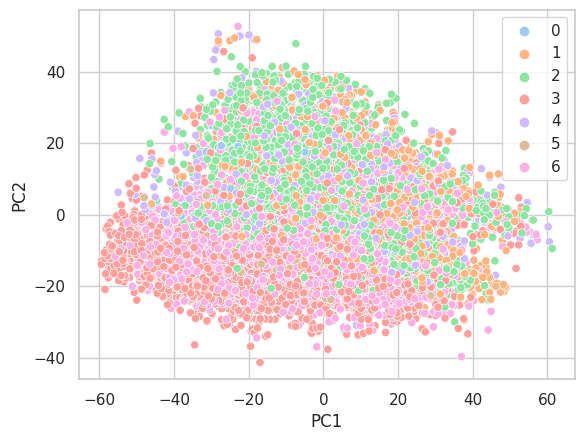

In [ ]:
sns.set(style="whitegrid")
fig, ax = plt.subplots()
sns.scatterplot(data=X_train_pca, x="PC1", y="PC2", hue=y_train, palette="pastel")

In [ ]:
fig = px.scatter_3d(X_train_pca, x="PC1", y="PC2", z="PC3", color=y_train, color_continuous_scale='GnBu')
fig.show()

### Model

XGBClassifier Batch Training

In [ ]:
X_train_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC15553,PC15554,PC15555,PC15556,PC15557,PC15558,PC15559,PC15560,PC15561,PC15562
0,-10.787167,6.306145,1.553807,3.075593,-10.607061,2.755621,1.882361,-4.016038,6.588767,2.038764,...,0.031425,0.030978,-0.310820,0.379709,-0.566753,0.218426,0.016055,0.616177,-0.185836,0.506217
1,28.498438,12.201732,7.728955,-3.458182,1.203779,-0.761922,-2.106495,1.138310,-3.451512,-1.155361,...,0.102885,-0.049202,0.096259,-0.099449,0.283591,-0.338511,-0.367018,-0.125344,-0.099808,0.172534
2,-14.010443,-9.045833,-10.957545,0.954076,5.643845,-9.755005,-6.655556,-3.337769,1.248688,0.183121,...,0.461794,0.477387,-0.362486,-0.041313,-0.350408,-0.290270,-0.081831,-0.561981,0.349668,0.172049
3,-31.887344,-20.006248,13.075783,-15.490202,-0.111636,5.015125,-3.095384,-3.026059,-4.083982,-1.665418,...,0.405524,0.053752,-0.050091,-0.432117,0.411802,0.067243,-0.474557,-0.338670,-0.085138,-0.100710
4,-6.197198,21.606777,-5.442398,-3.056066,-3.368328,-0.676237,2.285599,-0.551410,-0.426105,5.781007,...,0.037707,-0.010797,0.026753,-0.195220,-0.429082,-0.280763,0.347981,0.834860,0.180362,0.329350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20095,21.596987,-14.263661,-10.185131,2.465896,-0.549523,1.853833,5.245487,1.298228,-5.369878,3.400040,...,-0.632186,0.023614,0.412240,-0.531587,0.366539,-0.076500,0.073822,-0.169751,-0.060527,0.311527
20096,-28.162685,-3.319199,-10.419816,6.965140,10.288774,-0.811896,-5.652408,12.744771,-4.418456,4.213071,...,-0.227005,-0.779992,-0.508136,0.359494,0.298802,-0.737890,-0.165879,0.652294,-0.283855,-0.161839
20097,-41.215088,-18.964027,-12.304669,6.464345,0.519136,-9.877997,4.930209,4.047567,-4.658886,-0.819471,...,0.370143,-0.377712,0.272623,0.214622,0.052039,0.041048,0.268937,-0.160330,0.634598,-0.035861
20098,33.012711,-15.212077,-10.680743,3.777083,10.455796,7.752338,-1.112874,2.003782,-4.688587,-1.069022,...,-0.140534,-0.136165,-0.301701,0.159661,-0.633326,-0.704275,0.626329,-0.271818,0.457580,-0.347544


In [ ]:
X_train_pca_n = np.array(X_train_pca)
X_test_pca_n = np.array(X_test_pca)

In [ ]:
X_train_pca_n

array([[-1.0787167e+01,  6.3061452e+00,  1.5538075e+00, ...,
         6.1617726e-01, -1.8583602e-01,  5.0621730e-01],
       [ 2.8498438e+01,  1.2201732e+01,  7.7289548e+00, ...,
        -1.2534425e-01, -9.9807650e-02,  1.7253388e-01],
       [-1.4010443e+01, -9.0458326e+00, -1.0957545e+01, ...,
        -5.6198102e-01,  3.4966764e-01,  1.7204949e-01],
       ...,
       [-4.1215088e+01, -1.8964027e+01, -1.2304669e+01, ...,
        -1.6033024e-01,  6.3459808e-01, -3.5860971e-02],
       [ 3.3012711e+01, -1.5212077e+01, -1.0680743e+01, ...,
        -2.7181762e-01,  4.5758027e-01, -3.4754351e-01],
       [-1.0014156e+01,  4.1549610e+01,  6.0807366e+00, ...,
         1.0151141e-02, -3.9201766e-02, -7.2798270e-01]], dtype=float32)

In [ ]:
y_train

array([4, 1, 6, ..., 6, 2, 2])

In [ ]:
y_test

array([2, 6, 5, ..., 3, 2, 1])

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error

In [ ]:
size = len(X_train_pca_n)
print("Size of X_train_pca:", size)
for i in range(1, size):
  if (size % i) == 0:
    print(f'{i}', end=' ')

Size of X_train_pca: 20100
1 2 3 4 5 6 10 12 15 20 25 30 50 60 67 75 100 134 150 201 268 300 335 402 670 804 1005 1340 1675 2010 3350 4020 5025 6700 10050 

In [ ]:
batch_size = 3350
col_size = 15562
X_train_batched, y_train_batched = X_train_pca_n.reshape(-1,batch_size,col_size), y_train.reshape(-1,batch_size)

In [ ]:
model_xgbc = XGBClassifier()

In [ ]:
start_time = time.time()
# Fit Model
total_rmse=0
for i, (X_batch, y_batch) in enumerate(zip(X_train_batched, y_train_batched)):
    print(f'Step: {i}',end = ' ')
    if i == 0:
        model_xgbc.fit(X_batch, y_batch, verbose=False)
    else:
        model_xgbc.fit(X_batch, y_batch, verbose=False, xgb_model = model_xgbc)
    preds = model_xgbc.predict(X_test_pca_n)
    rmse = mean_squared_error(y_test, preds,squared=False)
    total_rmse+=rmse
end_time = time.time()
print("Time Taken:", end_time - start_time)

Step: 0 Step: 1 Step: 2 Step: 3 Step: 4 Step: 5 Time Taken: 3931.090758085251


In [ ]:
print(rmse)
print(total_rmse/5)

1.0682668345739965
1.24369183850207


In [ ]:
y_pred = model_xgbc.predict(X_test_pca_n)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8563432835820896
